# <center> Zestaw 5
## <center> Ryszard Pręcikowski
### <center> 401433

In [13]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt
from enum import IntEnum
import matplotlib
from scipy.integrate import quad
np.set_printoptions(precision=3, suppress=True)

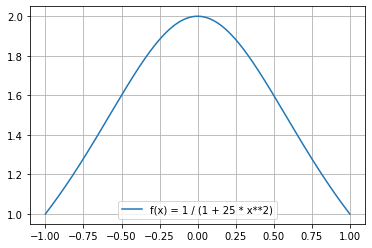

In [14]:
f = 2 / (1 + x**2)
a = -1
b = 1

lf = lambdify(x, f)
x_v = np.linspace(a, b, 1000)

plt.plot(x_v, lf(x_v), label = "f(x) = 1 / (1 + 25 * x**2)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
class Mode(IntEnum):
    MIDPOINT = 0
    TRAPEZOIDAL = 1
    SIMPSON_PARABOLIC = 2
    SIMPSON_CUBIC = 3
    GAUSS_LEGENDRE = 4

def my_integrate(f, m, mode, a, b):
    def fk(k):
        return lf(a + k * h)

    h = (b-a)/(m)
    lf = lambdify(x, f)

    if mode == Mode.MIDPOINT:
        res = 0
        for k in range(m):
            res += fk(k + 0.5)
        res *= h

    elif mode == Mode.TRAPEZOIDAL:
        res = fk(0) + fk(m)
        for k in range(1, m):
            res += 2 * fk(k)
        res *= h /2

    elif mode == Mode.SIMPSON_PARABOLIC:
        res = fk(0) + fk(m)
        for k in range(1, m):
            if k % 2 == 0:
                res += 2* fk(k)
            else:
                res += 4* fk(k)
        res *= h / 3

    elif mode == Mode.SIMPSON_CUBIC:
        res = fk(0) + fk(m)

        for k in range(1, m):
            if k % 3 == 0:
                res += 2* fk(k)
            else:
                res += 3* fk(k)
        res *= 3*h / 8

    else:
        res = Gauss_Legendre(f, m, a, b)

    return res

def Gauss_Legendre(f, m, a, b):
    p = legendre_poly(m, x, polys=True)
    r = p.real_roots()
    p_diff = diff(p, x)

    lf = lambdify(x, f)
    res = 0

    for xd in r:
        if xd == 0 or type(xd) == Mul:
            x_v = xd
        else:
            x_v = xd.eval_rational()
        w = 2 / ((1 - x_v**2) * (p_diff(x_v)** 2))
        res += w * lf(x_v)

    return float(res)

In [16]:
for n in range(2,5):
    print("n", n)
    true_val = integrate(f, (x, a, b))
    print("true val", true_val, "=", float(true_val))
    print()
    for mode in Mode:
        res = my_integrate(f, n, mode, a, b)
        print(mode)
        print("integral from", a, "to", b, "from", f, "=", res)
    print()

n 2
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.2
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0
Mode.SIMPSON_PARABOLIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.333333333333333
Mode.SIMPSON_CUBIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.0
Mode.GAUSS_LEGENDRE
integral from -1 to 1 from 2/(x**2 + 1) = 3.0

n 3
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.1794871794871793
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0666666666666664
Mode.SIMPSON_PARABOLIC
integral from -1 to 1 from 2/(x**2 + 1) = 2.844444444444444
Mode.SIMPSON_CUBIC
integral from -1 to 1 from 2/(x**2 + 1) = 3.1999999999999997
Mode.GAUSS_LEGENDRE
integral from -1 to 1 from 2/(x**2 + 1) = 3.1666666666666665

n 4
true val pi = 3.141592653589793

Mode.MIDPOINT
integral from -1 to 1 from 2/(x**2 + 1) = 3.162352941176471
Mode.TRAPEZOIDAL
integral from -1 to 1 from 2/(x**2 + 1) = 3.0999999999999996
M

0 [(5, (3.15492010092515 - pi)/pi), (6, (3.1508492098656 - pi)/pi), (7, (3.1483943359637 - pi)/pi), (8, (3.14680051839394 - pi)/pi), (9, (3.14570764873352 - pi)/pi), (10, (3.14492586400333 - pi)/pi), (11, (3.14434740512439 - pi)/pi), (12, (3.14390742722244 - pi)/pi), (13, (3.14356501469861 - pi)/pi), (14, (3.14329331752747 - pi)/pi), (15, (3.1430741242732 - pi)/pi), (16, (3.14289472959169 - pi)/pi), (17, (3.14274605103131 - pi)/pi), (18, (3.14262145655761 - pi)/pi), (19, (3.14251601200931 - pi)/pi), (20, (3.1424259850011 - pi)/pi), (21, (3.14234851005425 - pi)/pi), (22, (3.142281357739 - pi)/pi), (23, (3.14222277248158 - pi)/pi), (24, (3.1421713566498 - pi)/pi), (25, (3.14212598641926 - pi)/pi), (26, (3.14208574983853 - pi)/pi), (27, (3.1420499006431 - pi)/pi), (28, (3.14201782340255 - pi)/pi), (29, (3.14198900693035 - pi)/pi)]
1 [(5, (-3.11493212669683 + pi)/pi), (6, (-3.12307692307692 + pi)/pi), (7, (-3.12798828385035 + pi)/pi), (8, (-3.13117647058824 + pi)/pi), (9, (-3.1333624395750

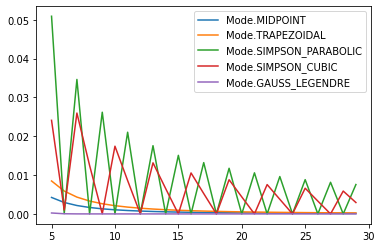

In [36]:
def error(f, n, mode):
    true_val = integrate(f, (x, a, b))
    integration_result = my_integrate(f, n, mode, -1, 1)
    return abs(true_val - integration_result) / true_val



def plot_error(f, s, t):
    points = [[] for _ in range (len(Mode))]

    for mode in Mode:
        for i in range(s, t):
            points[mode].append((i, error(f, i, mode)))

    # print(points)
    for i, xy in enumerate(points):
        print(i, xy)
        # plt.scatter([x[0] for x in xy], [x[1] for x in xy] )
        plt.plot([x[0] for x in xy], [x[1] for x in xy] , label = Mode(i))
    plt.legend()
    plt.show()

plot_error(f, 5, 30)